In [78]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt


2.637862 is derived from the lowest value after log transform.
Add 1 so least value isn't zero.
Total is 3.637862
Data is small enough to see by examination there are no missing values
However Row 37 (Q64) had small biomass = 0, I subbed in 0.0138918.
0.0138918 is taken from Row 6 (Q5) as a small but non-zero value

In [69]:

data_df = pd.read_csv("Data/PUPCYCLE_statistics_edit.csv")

data_df['chl a large cells (ug/L)'] = np.log(data_df['chl a large cells (ug/L)']) + 3.637862
data_df['chl a small cells (ug/L)'] = np.log(data_df['chl a small cells (ug/L)']) + 3.637862

C:\Users\sujin\miniconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [70]:
data_df.columns = ["Time_Point", "Shelf_Type", "Treatment", "Sample_N",
                                        "NO3", "PO4", "SiO2", "Biomass_L", "Biomass_S",
                                        "A_NO3_Uptake_L", "A_NO3_Uptake_S", "N_NO3_Uptake_L", "N_NO3_Uptake_S",
                                        "A_DIC_Uptake_L", "A_DIC_Uptake_S", "N_DIC_Uptake_L", "N_DIC_Uptake_S"]

In [71]:
data_df_l = data_df.drop(["Biomass_S"], axis = 1)
data_df_l["Cell_Size"] = "Large"
data_df_l.rename(columns={"Biomass_L": "Biomass"}, inplace = True)


In [72]:
data_df_s = data_df.drop(["Biomass_L"], axis = 1)
data_df_s["Cell_Size"] = "Small"
data_df_s.rename(columns={"Biomass_S": "Biomass"}, inplace = True)


In [73]:
data_df = data_df_l.append(data_df_s)
data_df = data_df.dropna()
display(data_df)

,Time_Point,Shelf_Type,Treatment,Sample_N,NO3,PO4,SiO2,Biomass,A_NO3_Uptake_L,A_NO3_Uptake_S,N_NO3_Uptake_L,N_NO3_Uptake_S,A_DIC_Uptake_L,A_DIC_Uptake_S,N_DIC_Uptake_L,N_DIC_Uptake_S,Cell_Size
0,T0,Wide,DW,Q1,17.20,1.830,25.80,-0.031921,0.017649,0.021613,0.088876,0.075180,0.059529,0.040746,0.0701,0.0455,Large
1,T0,Wide,DW,Q2,14.20,1.570,18.40,-0.470176,0.025079,0.023497,0.050533,0.067466,0.159076,0.059443,0.0166,0.0128,Large
2,T0,Wide,DW,Q3,16.80,1.800,23.50,-0.586710,0.031617,0.060366,0.132286,0.156068,0.079004,0.073758,0.0551,0.0428,Large
3,T1,Wide,Ctrl,Q4,14.20,1.730,18.50,0.644966,0.043921,0.018623,0.193321,0.066100,0.088369,0.035445,0.1979,0.0428,Large
4,T1,Wide,Ctrl,Q5,13.30,1.570,16.80,-0.638595,0.031993,0.019832,0.125148,0.081487,0.019484,0.046179,0.1684,0.0705,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,T2,Narrow,Fe,Q66,5.87,0.891,8.96,3.555176,3.061907,0.229678,0.277570,0.141166,85.133018,4.603926,1.3150,0.5453,Small
38,T2,Narrow,Fe,Q67,7.04,0.848,13.67,3.632467,6.203433,0.290541,0.433700,0.228491,136.957122,4.061551,1.5902,0.7095,Small
39,T2,Narrow,DFB,Q68,9.78,1.150,12.08,3.307172,0.324906,0.524122,0.132740,0.233132,9.427157,9.106643,0.6159,0.5283,Small
40,T2,Narrow,DFB,Q69,11.50,1.140,14.52,3.490637,0.862018,0.324181,0.217009,0.247702,20.599539,5.080398,0.8069,0.6308,Small


In [74]:
Group_Wide = data_df[data_df["Shelf_Type"] == "Wide"]
Group_Narrow = data_df[data_df["Shelf_Type"] == "Narrow"]


In [75]:
#2.A
#find variance of each group

print("Wide Shelf:")
print(np.var(Group_Wide["Biomass"]))

print("Narrow Shelf:")
print(np.var(Group_Narrow["Biomass"]))

print("Ratio:")
print(np.var(Group_Narrow["Biomass"])/np.var(Group_Wide["Biomass"]))


Wide Shelf:
1.5749373258219899
Narrow Shelf:
2.2546153025722244
Ratio:
1.4315587456126215


In [179]:
#Perform two sample t-test with equal variances
stats.ttest_ind(a=Group_Wide["Biomass"], b=Group_Narrow["Biomass"], equal_var=True)

Ttest_indResult(statistic=-8.156161199463526, pvalue=3.698034200968451e-12)

T-Statistic: -8.156161199463526

P-Value: 0.000000000003698034200968451

0.000000000003698034200968451 is not greater than 0.05

We have sufficient evidence to say the two groups(Wide and Narrow) are different


Make sure data is fit for Anova:
1) Remove T0 since it does not have treatment
2) Plot out residuals, make sure normally dist


In [166]:

data_df_anova = data_df[data_df["Time_Point"] != "T0"]
data_df_anova

,index,Time_Point,Shelf_Type,Treatment,Sample_N,NO3,PO4,SiO2,Biomass,A_NO3_Uptake_L,A_NO3_Uptake_S,N_NO3_Uptake_L,N_NO3_Uptake_S,A_DIC_Uptake_L,A_DIC_Uptake_S,N_DIC_Uptake_L,N_DIC_Uptake_S,Cell_Size
3,3,T1,Wide,Ctrl,Q4,14.20,1.730,18.50,0.644966,0.043921,0.018623,0.193321,0.066100,0.088369,0.035445,0.1979,0.0428,Large
4,4,T1,Wide,Ctrl,Q5,13.30,1.570,16.80,-0.638595,0.031993,0.019832,0.125148,0.081487,0.019484,0.046179,0.1684,0.0705,Large
5,5,T1,Wide,Ctrl,Q6,17.10,1.960,23.70,1.022728,0.045435,0.047304,0.214233,0.176613,0.137413,0.063333,0.1326,0.0785,Large
6,6,T1,Wide,Fe,Q7,15.50,1.770,20.80,0.367072,0.036513,0.019822,0.240498,0.065574,0.011231,0.065944,0.2203,0.0619,Large
7,7,T1,Wide,Fe,Q8,16.30,1.900,22.20,0.217959,0.040089,0.026857,0.198671,0.094496,0.146125,0.052890,0.1306,0.0816,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,37,T2,Narrow,Fe,Q66,5.87,0.891,8.96,3.555176,3.061907,0.229678,0.277570,0.141166,85.133018,4.603926,1.3150,0.5453,Small
79,38,T2,Narrow,Fe,Q67,7.04,0.848,13.67,3.632467,6.203433,0.290541,0.433700,0.228491,136.957122,4.061551,1.5902,0.7095,Small
80,39,T2,Narrow,DFB,Q68,9.78,1.150,12.08,3.307172,0.324906,0.524122,0.132740,0.233132,9.427157,9.106643,0.6159,0.5283,Small
81,40,T2,Narrow,DFB,Q69,11.50,1.140,14.52,3.490637,0.862018,0.324181,0.217009,0.247702,20.599539,5.080398,0.8069,0.6308,Small


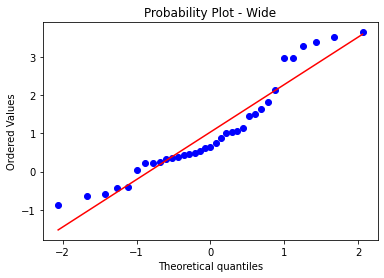

In [80]:
#Q-Q Plot

stats.probplot(data_df_anova[data_df_anova['Shelf_Type'] == "Wide"]['Biomass'], dist="norm", plot=plt)
plt.title("Probability Plot - " +  "Wide")
plt.show()


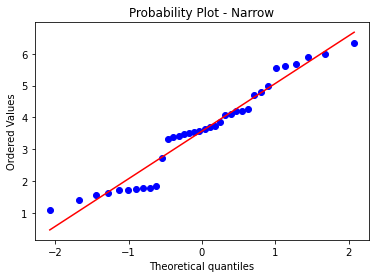

In [81]:
stats.probplot(data_df_anova[data_df_anova['Shelf_Type'] == "Narrow"]['Biomass'], dist="norm", plot=plt)
plt.title("Probability Plot - " +  "Narrow")
plt.show()


The data is normally distributed

In [180]:

from bioinfokit.analys import stat

res = stat()
res.tukey_hsd(df=data_df_anova, res_var='Biomass', xfac_var='Treatment', anova_model='Biomass ~ C(Shelf_Type) + C(Time_Point) + C(Treatment)+C(Cell_Size)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Ctrl,Fe,0.098541,-0.434260,0.631341,0.627355,0.890111
1,Ctrl,DFB,0.655409,0.128307,1.182511,4.217735,0.011068
2,Fe,DFB,0.753950,0.221149,1.286750,4.799979,0.003330


In [177]:
#2.B
#4-Way Anova (Shelf by time by treatment by cell size)

data_df_anova_2B = data_df_anova[["Shelf_Type", "Time_Point", "Treatment", "Cell_Size","Biomass"]]

model = ols('Biomass ~ C(Shelf_Type) + C(Time_Point) + C(Treatment)+C(Cell_Size) + C(Shelf_Type):C(Time_Point) +'
            + 'C(Shelf_Type):C(Treatment) +C(Shelf_Type):C(Cell_Size) +C(Time_Point):C(Treatment) +C(Time_Point):C(Cell_Size) +C(Treatment):C(Cell_Size)' , 
            data= data_df_anova_2B).fit()
#print(model.summary())
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Shelf_Type),118.025522,1.0,333.834975,2.903599e-25
C(Time_Point),41.409786,1.0,117.127504,2.411371e-15
C(Treatment),6.813739,2.0,9.636324,2.531765e-04
C(Cell_Size),45.090934,1.0,127.539626,4.640330e-16
C(Shelf_Type):C(Time_Point),0.007407,1.0,0.020951,8.854310e-01
C(Shelf_Type):C(Treatment),3.543036,2.0,5.010735,9.955877e-03
C(Shelf_Type):C(Cell_Size),8.222155,1.0,23.256351,1.127088e-05
C(Time_Point):C(Treatment),2.387227,2.0,3.376134,4.127061e-02
C(Time_Point):C(Cell_Size),2.166151,1.0,6.126954,1.636570e-02
C(Treatment):C(Cell_Size),1.301919,2.0,1.841238,1.680945e-01


A variable must have p-value < 0.05 to be statistically significant

So all variables except Shelf_Type, Time_Point Interaction and Treatment,Cell_Size Interaction have significant effect on the outcome (Biomass)

In [178]:
#2.C
#T0 Only 2-Sample T-Test
data_df_T0 = data_df[data_df["Time_Point"] == "T0"]
Group_Wide_T0 = data_df_T0[data_df_T0["Shelf_Type"] == "Wide"]
Group_Narrow_T0 = data_df_T0[data_df_T0["Shelf_Type"] == "Narrow"]

#find variance of each group

print("Wide Shelf:")
print(np.var(Group_Wide_T0["Biomass"]))

print("Narrow Shelf:")
print(np.var(Group_Narrow_T0["Biomass"]))

print("Ratio:")
print(np.var(Group_Narrow_T0["Biomass"])/np.var(Group_Wide_T0["Biomass"]))


Wide Shelf:
0.047603384644862246
Narrow Shelf:
0.4218020536898855
Ratio:
8.860757629665938


In [176]:
#perform two sample t-test
stats.ttest_ind(a=Group_Wide_T0["Biomass"], b=Group_Narrow_T0["Biomass"], equal_var=False)

Ttest_indResult(statistic=-7.575666526926777, pvalue=0.00025119033462612047)

T-Statistic: -7.575666526926777

P-Value: 0.00025119033462612047

0.00025119033462612047 is not greater than 0.05

We have sufficient evidence to say the two groups(Narrow and Wide) are different


In [117]:
#3: ANOVA but for uptake and Nutrient concentration 


data_df_anova_3 = data_df_anova[["Time_Point", "Shelf_Type", "Treatment", "Sample_N",
                                        "NO3", "PO4", "SiO2", "Biomass",
                                        "A_NO3_Uptake_L", "A_NO3_Uptake_S", "N_NO3_Uptake_L", "N_NO3_Uptake_S",
                                        "A_DIC_Uptake_L", "A_DIC_Uptake_S", "N_DIC_Uptake_L", "N_DIC_Uptake_S", "Cell_Size"]]
data_df_anova_3

,Time_Point,Shelf_Type,Treatment,Sample_N,NO3,PO4,SiO2,Biomass,A_NO3_Uptake_L,A_NO3_Uptake_S,N_NO3_Uptake_L,N_NO3_Uptake_S,A_DIC_Uptake_L,A_DIC_Uptake_S,N_DIC_Uptake_L,N_DIC_Uptake_S,Cell_Size
3,T1,Wide,Ctrl,Q4,14.20,1.730,18.50,0.644966,0.043921,0.018623,0.193321,0.066100,0.088369,0.035445,0.1979,0.0428,Large
4,T1,Wide,Ctrl,Q5,13.30,1.570,16.80,-0.638595,0.031993,0.019832,0.125148,0.081487,0.019484,0.046179,0.1684,0.0705,Large
5,T1,Wide,Ctrl,Q6,17.10,1.960,23.70,1.022728,0.045435,0.047304,0.214233,0.176613,0.137413,0.063333,0.1326,0.0785,Large
6,T1,Wide,Fe,Q7,15.50,1.770,20.80,0.367072,0.036513,0.019822,0.240498,0.065574,0.011231,0.065944,0.2203,0.0619,Large
7,T1,Wide,Fe,Q8,16.30,1.900,22.20,0.217959,0.040089,0.026857,0.198671,0.094496,0.146125,0.052890,0.1306,0.0816,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,T2,Narrow,Fe,Q66,5.87,0.891,8.96,3.555176,3.061907,0.229678,0.277570,0.141166,85.133018,4.603926,1.3150,0.5453,Small
38,T2,Narrow,Fe,Q67,7.04,0.848,13.67,3.632467,6.203433,0.290541,0.433700,0.228491,136.957122,4.061551,1.5902,0.7095,Small
39,T2,Narrow,DFB,Q68,9.78,1.150,12.08,3.307172,0.324906,0.524122,0.132740,0.233132,9.427157,9.106643,0.6159,0.5283,Small
40,T2,Narrow,DFB,Q69,11.50,1.140,14.52,3.490637,0.862018,0.324181,0.217009,0.247702,20.599539,5.080398,0.8069,0.6308,Small


In [118]:
Uptake = ["A_NO3_Uptake_L", "A_NO3_Uptake_S", "N_NO3_Uptake_L", "N_NO3_Uptake_S",
          "A_DIC_Uptake_L", "A_DIC_Uptake_S", "N_DIC_Uptake_L", "N_DIC_Uptake_S"]

for y in Uptake:
    print(y)
    model = ols(y + '~ C(Shelf_Type) + C(Time_Point) + C(Treatment) + C(Cell_Size)', data= data_df_anova_3).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    display(anova_table)

A_NO3_Uptake_L


,sum_sq,df,F,PR(>F)
C(Shelf_Type),77.439795,1.0,31.260542,4.820180e-07
C(Time_Point),45.225897,1.0,18.256583,6.437615e-05
C(Treatment),35.720067,2.0,7.209657,1.486226e-03
C(Cell_Size),0.000058,1.0,0.000024,9.961469e-01
Residual,161.020456,65.0,NaN,NaN


A_NO3_Uptake_S


,sum_sq,df,F,PR(>F)
C(Shelf_Type),1.286851,1.0,34.205596,1.760851e-07
C(Time_Point),0.571326,1.0,15.186342,2.329055e-04
C(Treatment),0.102929,2.0,1.367977,2.618535e-01
C(Cell_Size),0.000128,1.0,0.003406,9.536396e-01
Residual,2.445369,65.0,NaN,NaN


N_NO3_Uptake_L


,sum_sq,df,F,PR(>F)
C(Shelf_Type),0.912955,1.0,38.828812,3.859097e-08
C(Time_Point),0.101392,1.0,4.312308,4.179546e-02
C(Treatment),0.936379,2.0,19.912527,1.797084e-07
C(Cell_Size),0.000365,1.0,0.015540,9.011784e-01
Residual,1.528300,65.0,NaN,NaN


N_NO3_Uptake_S


,sum_sq,df,F,PR(>F)
C(Shelf_Type),0.371372,1.0,83.240702,3.002231e-13
C(Time_Point),0.000706,1.0,0.158216,6.921074e-01
C(Treatment),0.020102,2.0,2.252906,1.132394e-01
C(Cell_Size),0.000076,1.0,0.017072,8.964474e-01
Residual,0.289992,65.0,NaN,NaN


A_DIC_Uptake_L


,sum_sq,df,F,PR(>F)
C(Shelf_Type),28155.813570,1.0,32.937431,2.705867e-07
C(Time_Point),23562.300573,1.0,27.563816,1.790799e-06
C(Treatment),11536.584359,2.0,6.747904,2.173572e-03
C(Cell_Size),0.148105,1.0,0.000173,9.895383e-01
Residual,55563.770787,65.0,NaN,NaN


A_DIC_Uptake_S


,sum_sq,df,F,PR(>F)
C(Shelf_Type),277.620826,1.0,17.717935,0.000080
C(Time_Point),225.448489,1.0,14.388264,0.000329
C(Treatment),36.217938,2.0,1.155726,0.321213
C(Cell_Size),0.074277,1.0,0.004740,0.945320
Residual,1018.479500,65.0,NaN,NaN


N_DIC_Uptake_L


,sum_sq,df,F,PR(>F)
C(Shelf_Type),6.478768,1.0,105.890420,2.819729e-15
C(Time_Point),3.205132,1.0,52.385395,6.584623e-10
C(Treatment),5.441454,2.0,44.468168,6.777927e-13
C(Cell_Size),0.001334,1.0,0.021802,8.830714e-01
Residual,3.976940,65.0,NaN,NaN


N_DIC_Uptake_S


,sum_sq,df,F,PR(>F)
C(Shelf_Type),2.023565,1.0,86.625012,1.429781e-13
C(Time_Point),0.958762,1.0,41.042794,1.913135e-08
C(Treatment),0.106006,2.0,2.268949,1.115536e-01
C(Cell_Size),0.000004,1.0,0.000150,9.902604e-01
Residual,1.518404,65.0,NaN,NaN


Statistically Significant: 

A_NO3_Uptake_L: Shelf_Type, Time_Point, Treatment

A_NO3_Uptake_S: Shelf_Type, Time_Point

N_NO3_Uptake_L: Shelf_Type, Time_Point, Treatment

N_NO3_Uptake_S: Shelf_Type

A_DIC_Uptake_L: Shelf_Type, Time_Point, Treatment

A_DIC_Uptake_S: Shelf_Type, Time_Point

N_DIC_Uptake_L: Shelf_Type, Time_Point, Treatment

N_DIC_Uptake_S: Shelf_Type, Time_Point


In [119]:
Nutrient = ["NO3", "PO4", "SiO2"]

for y in Nutrient:
    print(y)
    model = ols(y + '~ C(Shelf_Type) + C(Time_Point) + C(Treatment) + C(Cell_Size)', data= data_df_anova_3).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    display(anova_table)

NO3


,sum_sq,df,F,PR(>F)
C(Shelf_Type),615.281716,1.0,84.482239,2.282399e-13
C(Time_Point),48.835717,1.0,6.705466,1.184994e-02
C(Treatment),38.655366,2.0,2.653818,7.800148e-02
C(Cell_Size),0.061772,1.0,0.008482,9.269048e-01
Residual,473.393128,65.0,NaN,NaN


PO4


,sum_sq,df,F,PR(>F)
C(Shelf_Type),5.755589,1.0,92.646355,3.978864e-14
C(Time_Point),1.522944,1.0,24.514471,5.526051e-06
C(Treatment),0.435488,2.0,3.504974,3.584496e-02
C(Cell_Size),0.000714,1.0,0.011500,9.149297e-01
Residual,4.038079,65.0,NaN,NaN


SiO2


,sum_sq,df,F,PR(>F)
C(Shelf_Type),1289.163278,1.0,85.135434,1.977698e-13
C(Time_Point),26.106949,1.0,1.724085,1.937849e-01
C(Treatment),72.558141,2.0,2.395844,9.909772e-02
C(Cell_Size),0.160281,1.0,0.010585,9.183729e-01
Residual,984.262477,65.0,NaN,NaN


NO3:  Shelf_Type, Time_Point
PO4:  Shelf_Type, Time_Point, Treatment
SiO2: Shelf_Type

In [147]:
#PCA

from sklearn.preprocessing import StandardScaler

data_df_PCA = data_df.reset_index(drop=True)


features = ["Biomass","A_NO3_Uptake_L", "A_NO3_Uptake_S", 
            "N_NO3_Uptake_L", "N_NO3_Uptake_S", "A_DIC_Uptake_L", "A_DIC_Uptake_S", 
            "N_DIC_Uptake_L", "N_DIC_Uptake_S"]

# Separating out the features
x = data_df_PCA.loc[:, features].values

# Separating out the target
y = data_df_PCA.loc[:,['Shelf_Type']].values


#Standardizing Features
x = StandardScaler().fit_transform(x)

In [148]:
display(data_df_PCA)

,index,Time_Point,Shelf_Type,Treatment,Sample_N,NO3,PO4,SiO2,Biomass,A_NO3_Uptake_L,A_NO3_Uptake_S,N_NO3_Uptake_L,N_NO3_Uptake_S,A_DIC_Uptake_L,A_DIC_Uptake_S,N_DIC_Uptake_L,N_DIC_Uptake_S,Cell_Size
0,0,T0,Wide,DW,Q1,17.20,1.830,25.80,-0.031921,0.017649,0.021613,0.088876,0.075180,0.059529,0.040746,0.0701,0.0455,Large
1,1,T0,Wide,DW,Q2,14.20,1.570,18.40,-0.470176,0.025079,0.023497,0.050533,0.067466,0.159076,0.059443,0.0166,0.0128,Large
2,2,T0,Wide,DW,Q3,16.80,1.800,23.50,-0.586710,0.031617,0.060366,0.132286,0.156068,0.079004,0.073758,0.0551,0.0428,Large
3,3,T1,Wide,Ctrl,Q4,14.20,1.730,18.50,0.644966,0.043921,0.018623,0.193321,0.066100,0.088369,0.035445,0.1979,0.0428,Large
4,4,T1,Wide,Ctrl,Q5,13.30,1.570,16.80,-0.638595,0.031993,0.019832,0.125148,0.081487,0.019484,0.046179,0.1684,0.0705,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,37,T2,Narrow,Fe,Q66,5.87,0.891,8.96,3.555176,3.061907,0.229678,0.277570,0.141166,85.133018,4.603926,1.3150,0.5453,Small
79,38,T2,Narrow,Fe,Q67,7.04,0.848,13.67,3.632467,6.203433,0.290541,0.433700,0.228491,136.957122,4.061551,1.5902,0.7095,Small
80,39,T2,Narrow,DFB,Q68,9.78,1.150,12.08,3.307172,0.324906,0.524122,0.132740,0.233132,9.427157,9.106643,0.6159,0.5283,Small
81,40,T2,Narrow,DFB,Q69,11.50,1.140,14.52,3.490637,0.862018,0.324181,0.217009,0.247702,20.599539,5.080398,0.8069,0.6308,Small


In [150]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2', "PC3", "PC4", "PC5", "PC6"])

principalDf

,PC1,PC2,PC3,PC4,PC5,PC6
0,-2.501970,0.758585,0.453911,0.252568,-0.113587,-0.041220
1,-2.734992,0.913170,0.542895,0.408002,-0.114413,-0.017430
2,-2.241309,0.551198,0.045859,0.804477,-0.517154,-0.120943
3,-2.204594,0.399627,0.393527,0.040081,0.203900,-0.188307
4,-2.449234,0.628421,0.386616,0.547688,-0.034100,0.206412
...,...,...,...,...,...,...
78,2.061065,0.517747,1.478706,-0.480107,0.260011,0.635838
79,3.990773,-0.131486,2.530234,0.379977,-0.292151,0.626539
80,1.297629,2.132963,-1.188375,-0.370073,-0.310583,-0.082122
81,1.387726,0.955978,-0.665115,-0.579876,-0.739403,0.405112


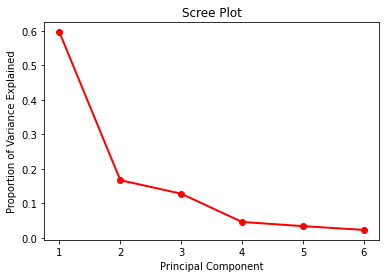

In [151]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

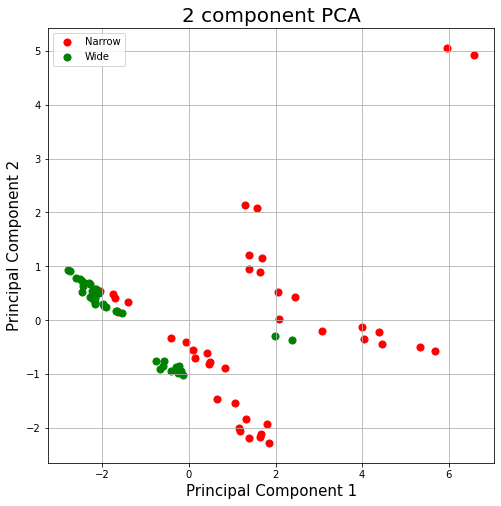

In [184]:
import matplotlib.pyplot as plt

finalDf = pd.concat([principalDf, data_df_PCA[['Shelf_Type']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Narrow', 'Wide']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Shelf_Type'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

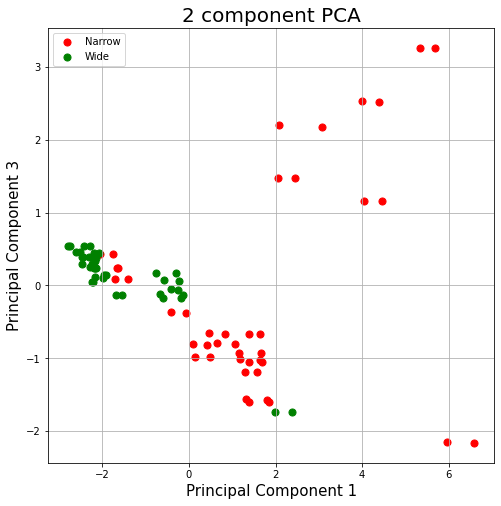

In [185]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Narrow', 'Wide']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Shelf_Type'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

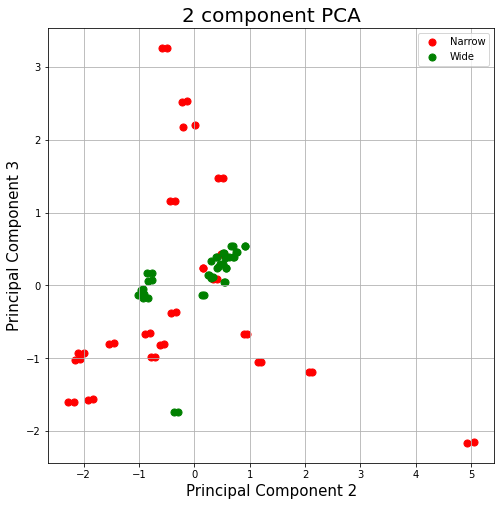

In [186]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Narrow', 'Wide']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Shelf_Type'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC2']
               , finalDf.loc[indicesToKeep, 'PC3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# 

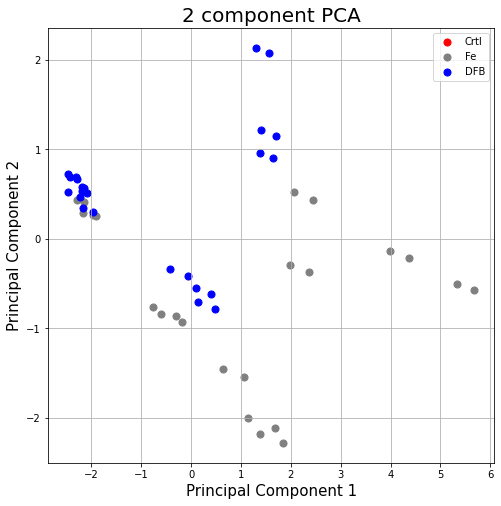

In [192]:
#PCA for Treatment

finalDf_treatment = pd.concat([principalDf, data_df_PCA[['Treatment']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Crtl', 'Fe', "DFB"]
colors = ['r', 'grey', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf_treatment['Treatment'] == target
    ax.scatter(finalDf_treatment.loc[indicesToKeep, 'PC1']
               , finalDf_treatment.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

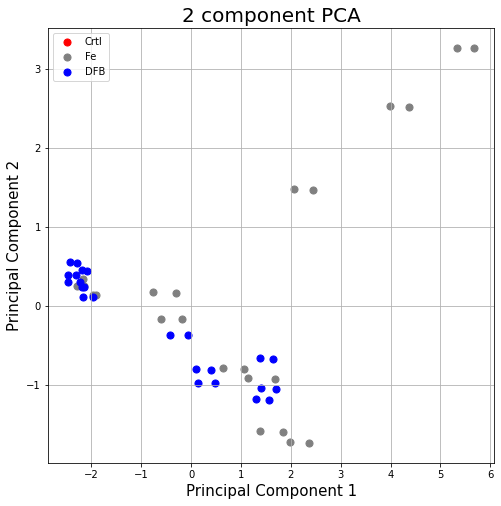

In [193]:
#PCA for Treatment

finalDf_treatment = pd.concat([principalDf, data_df_PCA[['Treatment']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Crtl', 'Fe', "DFB"]
colors = ['r', 'grey', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf_treatment['Treatment'] == target
    ax.scatter(finalDf_treatment.loc[indicesToKeep, 'PC1']
               , finalDf_treatment.loc[indicesToKeep, 'PC3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

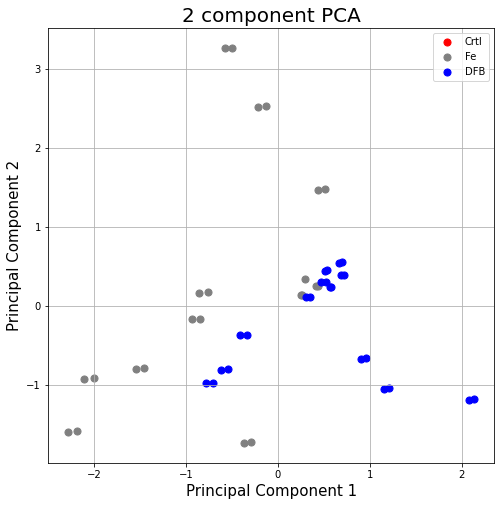

In [194]:
#PCA for Treatment

finalDf_treatment = pd.concat([principalDf, data_df_PCA[['Treatment']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Crtl', 'Fe', "DFB"]
colors = ['r', 'grey', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf_treatment['Treatment'] == target
    ax.scatter(finalDf_treatment.loc[indicesToKeep, 'PC2']
               , finalDf_treatment.loc[indicesToKeep, 'PC3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()